## 2. Data Wrangling

### Common Data Formats

- CSV
- XML
- JSON

### Relational Databases

Why is relational database useful?

- It is straightforward to extract aggregated data with complex fillers
- A database scales well
- It ensures all data is consistently formatted

use SQL to access databases

### API (Application Programming Interface)

Most widely used is (in places like Twitter):

REST(Representational State Transfer)

You usually do API call as follows:

import json
import requests

url = 'xxxxx 무슨 홈페이지 주소'

Make API call using requests library and load the results into a dict

data = requests.get(url).text
data = json.loads(data)

### Sanity Check

- Does the data make sense?
- Is there a problem?
- Does the data look like I expect it to?

Pandas DataFrame describe()

#### Why are values missing?

- Occasional system errors prevent data from being recorded
- Same subset of subjects or event types are systematically missing certain data attributes or missing entirely

#### Dealing with missing data

- Partial Deletion
  - Listwise deletion: remove particular data point from all analyses even if some useful values were present
  - Pairwise deletion: exclude a particular case from the analysis for tasks which are not possible with the data at hand
- Imputation: process of approximating missing values
  - Why impute 1 : If we just get rid of data, data is not enough
  - Why impute 2 : Removing data could affect representativeness

#### Imputation Methods

- Fill missing values with mean (fillna method)
- Impute using linear regression: Make an equation to predict variable missing values and then predict missing values
  - Drawback 1: Overemphasize trends
  - Drawback 2: Exact values for missing entries which will suggest greater certainty than we actually have

## 3. Data Analysis

#### Statistical Rigor

#### Significance tests

- using our data, can we disprove an assumption with a pre-defined level of confidence?
- e.g. 1,000 people in office. Favorite color? Can't check all 1,000 people, so only check 10. If 10 out of 10 polled say 'blue', blue becomes the most popular color (using smaller samples to say sth about the larger dataset)

Why are statistical signifiance tests useful?

- They provide a formalized framework for comparing and evaluating data
- They enable us to evaluate whether perceived effects in our dataset reflect differences across the whole population

- Many tests might make assumptions about data's distribution
- Very common distirbution - NORMAL DISTRIBUTION (a.k.a. Gaussian distribution, Bell curve)

#### Normal Distribution

two parameters:
- μ (mean)
- σ (standard deviation)

In [1]:
# Normal Distribution f(x) 수식 append 필요

#### t-test

- Used for the purpose of whether to accepting or rejecting a null hypothesis
- NULL hypothesis : A statement we are trying to disprove by running our test
- Signficance Level: probability of rejecting the null hypothesis when it is true. For example, a significance level of 0.05 indicates a 5% risk of concluding that a difference exists when there is no actual difference.
  - TEST statistic (T-values) : one number that helps accept or reject the null hypothesis

ref) https://www.socialresearchmethods.net/kb/stat_t.php

import scipy.stats

scipy.stats.ttest_ind(list_1, list_2, equal_var = False)

(parameter) equal_var : If True (default), perform a standard independent 2 sample test that assumes equal population variances [R643]. If False, perform Welch’s t-test, which does not assume equal population variance

returns a tuple

ref) https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

Q.) You will be given a csv file that has three columns.  A player's name, handedness (L for lefthanded or R for righthanded) and their career batting average (called 'avg').  Write a function that will read that the csv file into a pandas data frame, and run Welch's t-test on the two cohorts defined by handedness. One cohort should be a data frame of right-handed batters. And the other cohort should be a data frame of left-handed batters. With a significance level of 95%, if there is no difference between the two cohorts, return a tuple consisting of True, and then the tuple returned by scipy.stats.ttest.

In [2]:
import pandas as pd
import numpy as np

baseball_df = pd.read_csv('./baseball_stats.csv')

In [3]:
baseball_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18177 entries, 0 to 18176
Data columns (total 6 columns):
name          18177 non-null object
handedness    16974 non-null object
height        18177 non-null object
weight        18177 non-null object
avg           18177 non-null float64
HR            18177 non-null int64
dtypes: float64(1), int64(1), object(4)
memory usage: 852.1+ KB


In [4]:
baseball_df.head()

,name,handedness,height,weight,avg,HR
0,Brandon Hyde,R,75,210,0.000,0
1,Carey Selph,R,69,175,0.277,0
2,Philip Nastu,L,74,180,0.040,0
3,Kent Hrbek,L,76,200,0.282,293
4,Bill Risley,R,74,215,0.000,0


In [5]:
right_batter_df = \
baseball_df.loc[baseball_df.handedness == 'R']

left_batter_df = \
baseball_df.loc[baseball_df.handedness == 'L']

In [6]:
import scipy.stats

result = \
scipy.stats.ttest_ind(right_batter_df['avg'], left_batter_df['avg'], 
                      equal_var = False)

In [7]:
# significance level : 95%

if result[1] <= .05:
    print(False, result)
else:
    print(True, result)

False Ttest_indResult(statistic=-9.9357022262420944, pvalue=3.8102742258887383e-23)


### When data is non-normal

#### Shapiro-Wilk Test (Checking whether data is Gaussian)

w,p = scipy.stats.shapiro(data)

w: test statistic
p: p-value

Non-parametric test: A statistical test that does not assume our data is drawn from any particular underlying probability distribution

#### Mann-Whitney u test

Tests null hypothesis that two populations are the same

u,p = scipy.stats.mannwhitneyu(x,y)

u: mann-whitney statistics
p: p-value

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html

http://docs.scipy.org/doc/numpy/reference/generated/numpy.mean.html

### Machine learning

A branch of artificial intelligence focused on constructing systems and learnf rom large amounts of data to make predictions

#### Statistics v.s. Machine Leaerning

What is the difference between statistics and machine learning

Not much.... However...
- Statistics is focused on analyzing existing data, and drawing valid conclusions
- Machine learning is foucused on making predictions

#### Types of Machine Learning
- Supervised Learning
  - Have training samples with input and output
  - Predict output for future input-only data
  - Classification
  - Regression
 
- Unsupervised Learning
  - Trying to understand the structure of the data
  - Clustering

#### Predicting with Regression

Predicting lifetime number of home-runs(HRs)

Can we write an equation that takes a bunch of info (e.g. height, weight, birth year, position) and predict HR?

Input data -> Model -> Predictions

Gradient Descent & Cost Function

In [8]:
# cost function 관련 수식들 모두 append 필요

Q.) Write code here that performs num_iterations updates to the elements of theta. times. Every time you compute the cost for a given list of thetas, append it to cost_history. You may use the helper function like "compute_cost" listed below

In [9]:
import numpy as np
import pandas as pd

def compute_cost(features, values, theta):
    """
    Compute the cost of a list of parameters, theta, given a list of features 
    (input data points) and values (output data points).
    """
    m = len(values)
    sum_of_square_errors = numpy.square(numpy.dot(features, theta) - values).sum()
    cost = sum_of_square_errors / (2*m)

    return cost

def gradient_descent(features, values, theta, alpha, num_iterations):
    """
    Perform gradient descent given a data set with an arbitrary number of features.
    """
    cost_history = []
    
    for i in range(num_iterations):
        predicted_values = numpy.dot(features, theta)
        theta = theta - alpha / m * np.dot((predicted_values - value), features)
        cost = compute_cost(features, values, theta)
        cost_history.append(cost)
    return theta, pandas.Series(cost_history)


#### Coefficient of Determination (Checking whether model is effective) 

- R^2 closer to 1 : better the model, closer it is to zero, poorer our model

Q.) Write a function that, given two input numpy arrays, 'data', and 'predictions,' returns the coefficient of determination, R^2, for the model that produced predictions. Numpy has a couple of functions -- np.mean() and np.sum() -- that you might find useful, but you don't have to use them

In [11]:
import numpy as np

def compute_r_squared(data, predictions):
    r_squared = 1 - ((predictions* - data)**2).sum() / \
    ((data - np.mean(data))**2).sum()
    return r_squared

Additional Considerations

- Other types of linear regression
  - Ordinary least squares regression: Always guaranteed to find the optimal outcome whereas gradient descent is not
- Parameter Estimation: What are the confidence intervals on our parameters?
- Under / Overfitting
- Multiple local minima : use various different random initial thetas / seed random values for repeatability for restoration purposes 

### Problem Set 3

In [32]:
turnstile_data_weather_df = \
pd.read_csv('./turnstile_data_master_with_weather.csv')

In [33]:
turnstile_data_weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131951 entries, 0 to 131950
Data columns (total 22 columns):
Unnamed: 0         131951 non-null int64
UNIT               131951 non-null object
DATEn              131951 non-null object
TIMEn              131951 non-null object
Hour               131951 non-null int64
DESCn              131951 non-null object
ENTRIESn_hourly    131951 non-null float64
EXITSn_hourly      131951 non-null float64
maxpressurei       131951 non-null float64
maxdewpti          131951 non-null float64
mindewpti          131951 non-null float64
minpressurei       131951 non-null float64
meandewpti         131951 non-null float64
meanpressurei      131951 non-null float64
fog                131951 non-null float64
rain               131951 non-null float64
meanwindspdi       131951 non-null float64
mintempi           131951 non-null float64
meantempi          131951 non-null float64
maxtempi           131951 non-null float64
precipi            131951 non-null fl

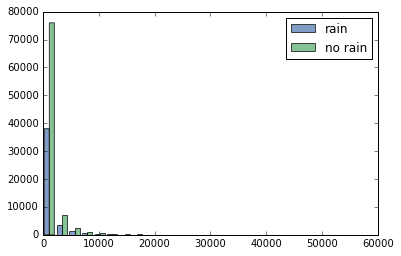

In [37]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn-deep')

entries_hourly_rain = turnstile_data_weather_df.\
loc[turnstile_data_weather_df.rain==1, 'ENTRIESn_hourly']
    
entries_hourly_norain = turnstile_data_weather_df.\
             loc[turnstile_data_weather_df.rain==0, 'ENTRIESn_hourly']

plt.hist([entries_hourly_rain,entries_hourly_norain], 
         bins=23, alpha=0.7, label=['rain', 'no rain'])
plt.legend(loc='upper right')

# non-normal distribution

Q.)  You will want to take the means and run the Mann Whitney U-test on the ENTRIESn_hourly column in the turnstile_weather dataframe. This function should return:
- The mean of entries with rain
- The mean of entries without rain
- The Mann-Whitney U-statistic and p-value comparing the number of entries with rain and the number of entries without rain. You should feel free to use scipy's Mann-Whitney implementation, and you might also find it useful to use numpy's mean function.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html

In [39]:
print(entries_hourly_rain.mean())
print(entries_hourly_norain.mean())

u,p =\
scipy.stats.mannwhitneyu(entries_hourly_rain, entries_hourly_norain)

print(u,p)

1105.4463767458733
1090.278780151855
1924409167.0 0.0193096344138


Q.) Use Linear Regression
Using the information stored in the dataframe, let's predict the ridership of the NYC subway using linear regression with gradient descent
Your prediction should have a R^2 value of 0.40 or better. You need to experiment using various input features contained in the dataframe. Select features (in the predictions procedure) and make predictions.

In [45]:
import numpy as np
import pandas as pd

def normalize_features(df):
    """
    Normalize the features in the data set.
    """
    mu = df.mean()
    sigma = df.std()
    
    if (sigma == 0).any():
        raise Exception("One or more features had the same value for all samples, \
        and thus could " + "not be normalized. Please do not include features \
        with only a single value " + "in your model.")
    df_normalized = (df - df.mean()) / df.std()

    return df_normalized, mu, sigma

def compute_cost(features, values, theta):
    """
    Compute the cost function given a set of features / values, 
    and the values for our thetas.
    """
    
    m = len(values)
    sum_of_square_errors = np.square(np.dot(features, theta) - values).sum()
    cost = sum_of_square_errors / (2*m)

    return cost

def gradient_descent(features, values, theta, alpha, num_iterations):
    """
    Perform gradient descent given a data set with an arbitrary number of features.
    
    This can be the same gradient descent code as in the lesson #3 exercises,
    but feel free to implement your own.
    """
    
    m = len(values)
    cost_history = []

    for i in range(num_iterations):
        predicted_values = np.dot(features, theta)
        theta = theta - alpha / m * np.dot((predicted_values - values), features)
        cost = compute_cost(features, values, theta)
        cost_history.append(cost)
    return theta, pd.Series(cost_history)

In [50]:

def predictions(dataframe):    
    # Select Features (try different features!)
    features = dataframe[['rain', 'precipi', 'Hour', 'meantempi']]
    
    # Add UNIT to features using dummy variables
    dummy_units = pd.get_dummies(dataframe['UNIT'], prefix='unit')
    features = features.join(dummy_units)
    
    # Values
    values = dataframe['ENTRIESn_hourly']
    m = len(values)

    features, mu, sigma = normalize_features(features)
    features['ones'] = np.ones(m) # Add a column of 1s (y intercept)
    
    # Convert features and values to numpy arrays
    features_array = np.array(features)
    values_array = np.array(values)

    # Set values for alpha, number of iterations.
    alpha = 0.1 # please feel free to change this value
    num_iterations = 75 # please feel free to change this value

    # Initialize theta, perform gradient descent
    theta_gradient_descent = np.zeros(len(features.columns))
    theta_gradient_descent, cost_history = \
    gradient_descent(features_array, values_array, theta_gradient_descent, 
                     alpha, num_iterations)

    # plot = plot_cost_history(alpha, cost_history)
    plot = None
    
    predictions = np.dot(features_array, theta_gradient_descent)
    return predictions, plot


def plot_cost_history(alpha, cost_history):
    """This function is for viewing the plot of your cost history"""
    cost_df = pd.DataFrame({
      'Cost_History': cost_history,
      'Iteration': range(len(cost_history))
   })
    return ggplot(cost_df, aes('Iteration', 'Cost_History')) + \
    geom_point() + ggtitle('Cost History for alpha = %.3f' % alpha )

In [51]:
predictions(turnstile_data_weather_df)

(array([ 3379.34466358,  3648.71075058,  3918.07683757, ...,   856.38536737,
          856.38536737,   856.38536737]), None)

Q.) Using the same methods that we used to plot a histogram of entries
per hour for our data, why don't you make a histogram of the residuals
(that is, the difference between the original hourly entry data and the predicted values). Try different bin-widths for your histogram. Based on this residual histogram, do you have any insight into how our model performed?  Reading a bit on this webpage might be useful:
http://www.itl.nist.gov/div898/handbook/pri/section2/pri24.htm

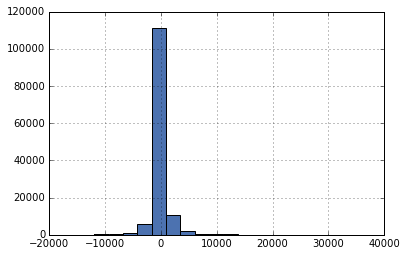

In [67]:
# plot residuals

import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

(turnstile_data_weather_df['ENTRIESn_hourly'] -
 predictions(turnstile_data_weather_df)[0]).hist(bins=20)